In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 1: Load the dataset
data = pd.read_csv('/content/Titanic-Dataset.csv')
print("Dataset Preview:")

data.drop(columns=["Name","Ticket","Cabin"],inplace=True)
data.head()
data.isnull().sum()
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data.isnull().sum()
data.head()


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])
data.head()
data.drop(columns=["PassengerId"],inplace=True)
data.head()

Dataset Preview:


<ipython-input-18-22dfe67a97d0>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)
<ipython-input-18-22dfe67a97d0>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2



Summary Statistics (Numeric Columns Only):
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587   29.699118    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.002015    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   29.699118    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked  
count  891.000000  891.000000  
mean    32.204208    1.536476  
std     49.693429    0.791503  
min      0.000000    0.000000  
25%      7.910400    1.000000  
50%     14.454200    2.000000  
75

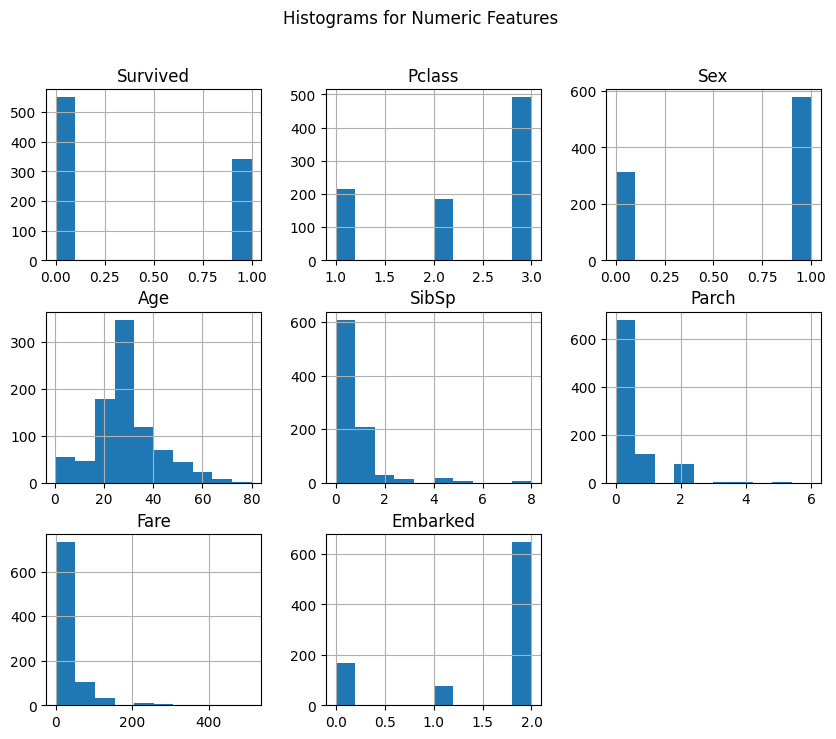


Creating boxplots...


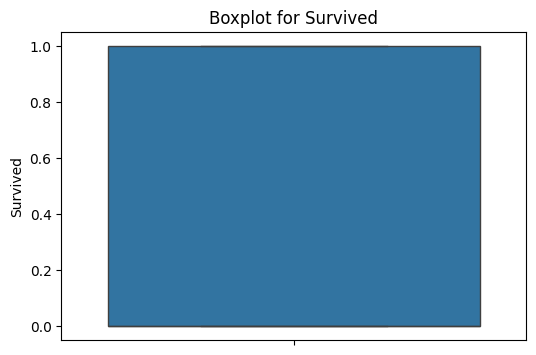

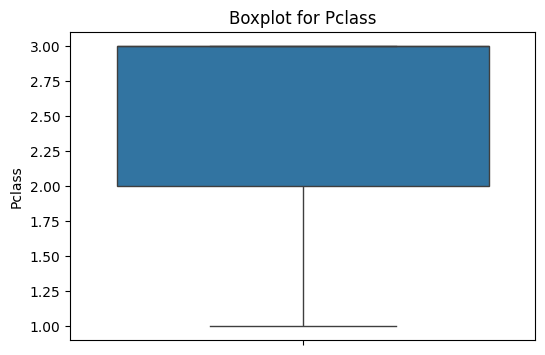

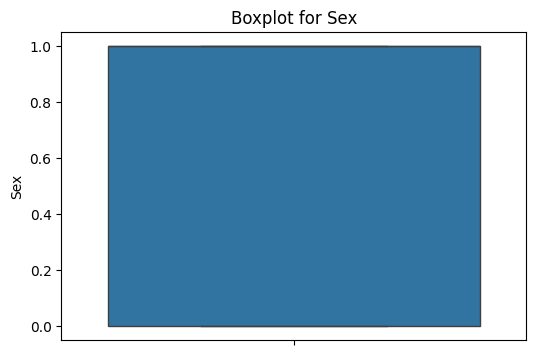

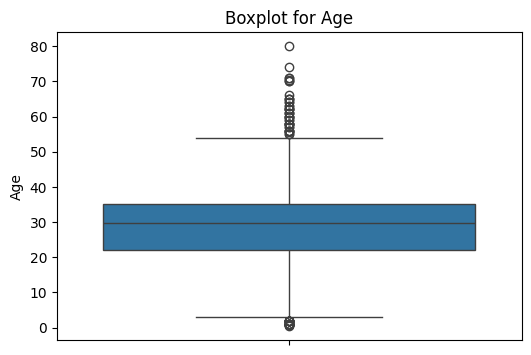

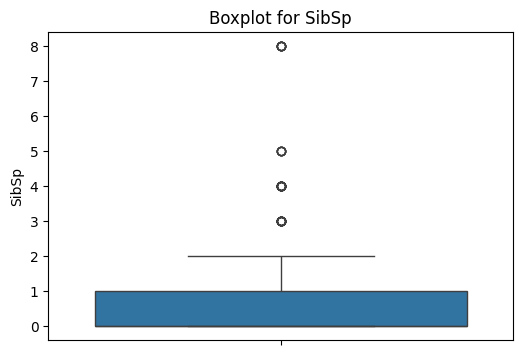

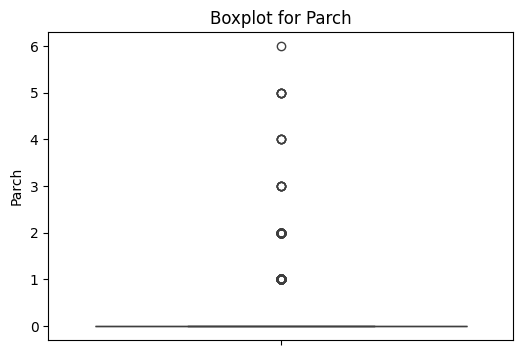

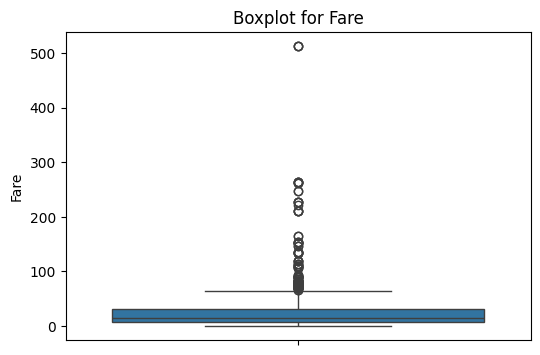

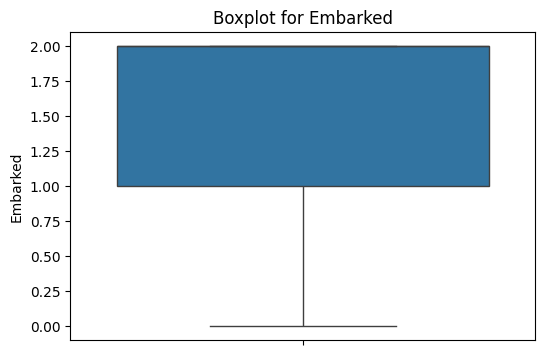


Creating pairplot...


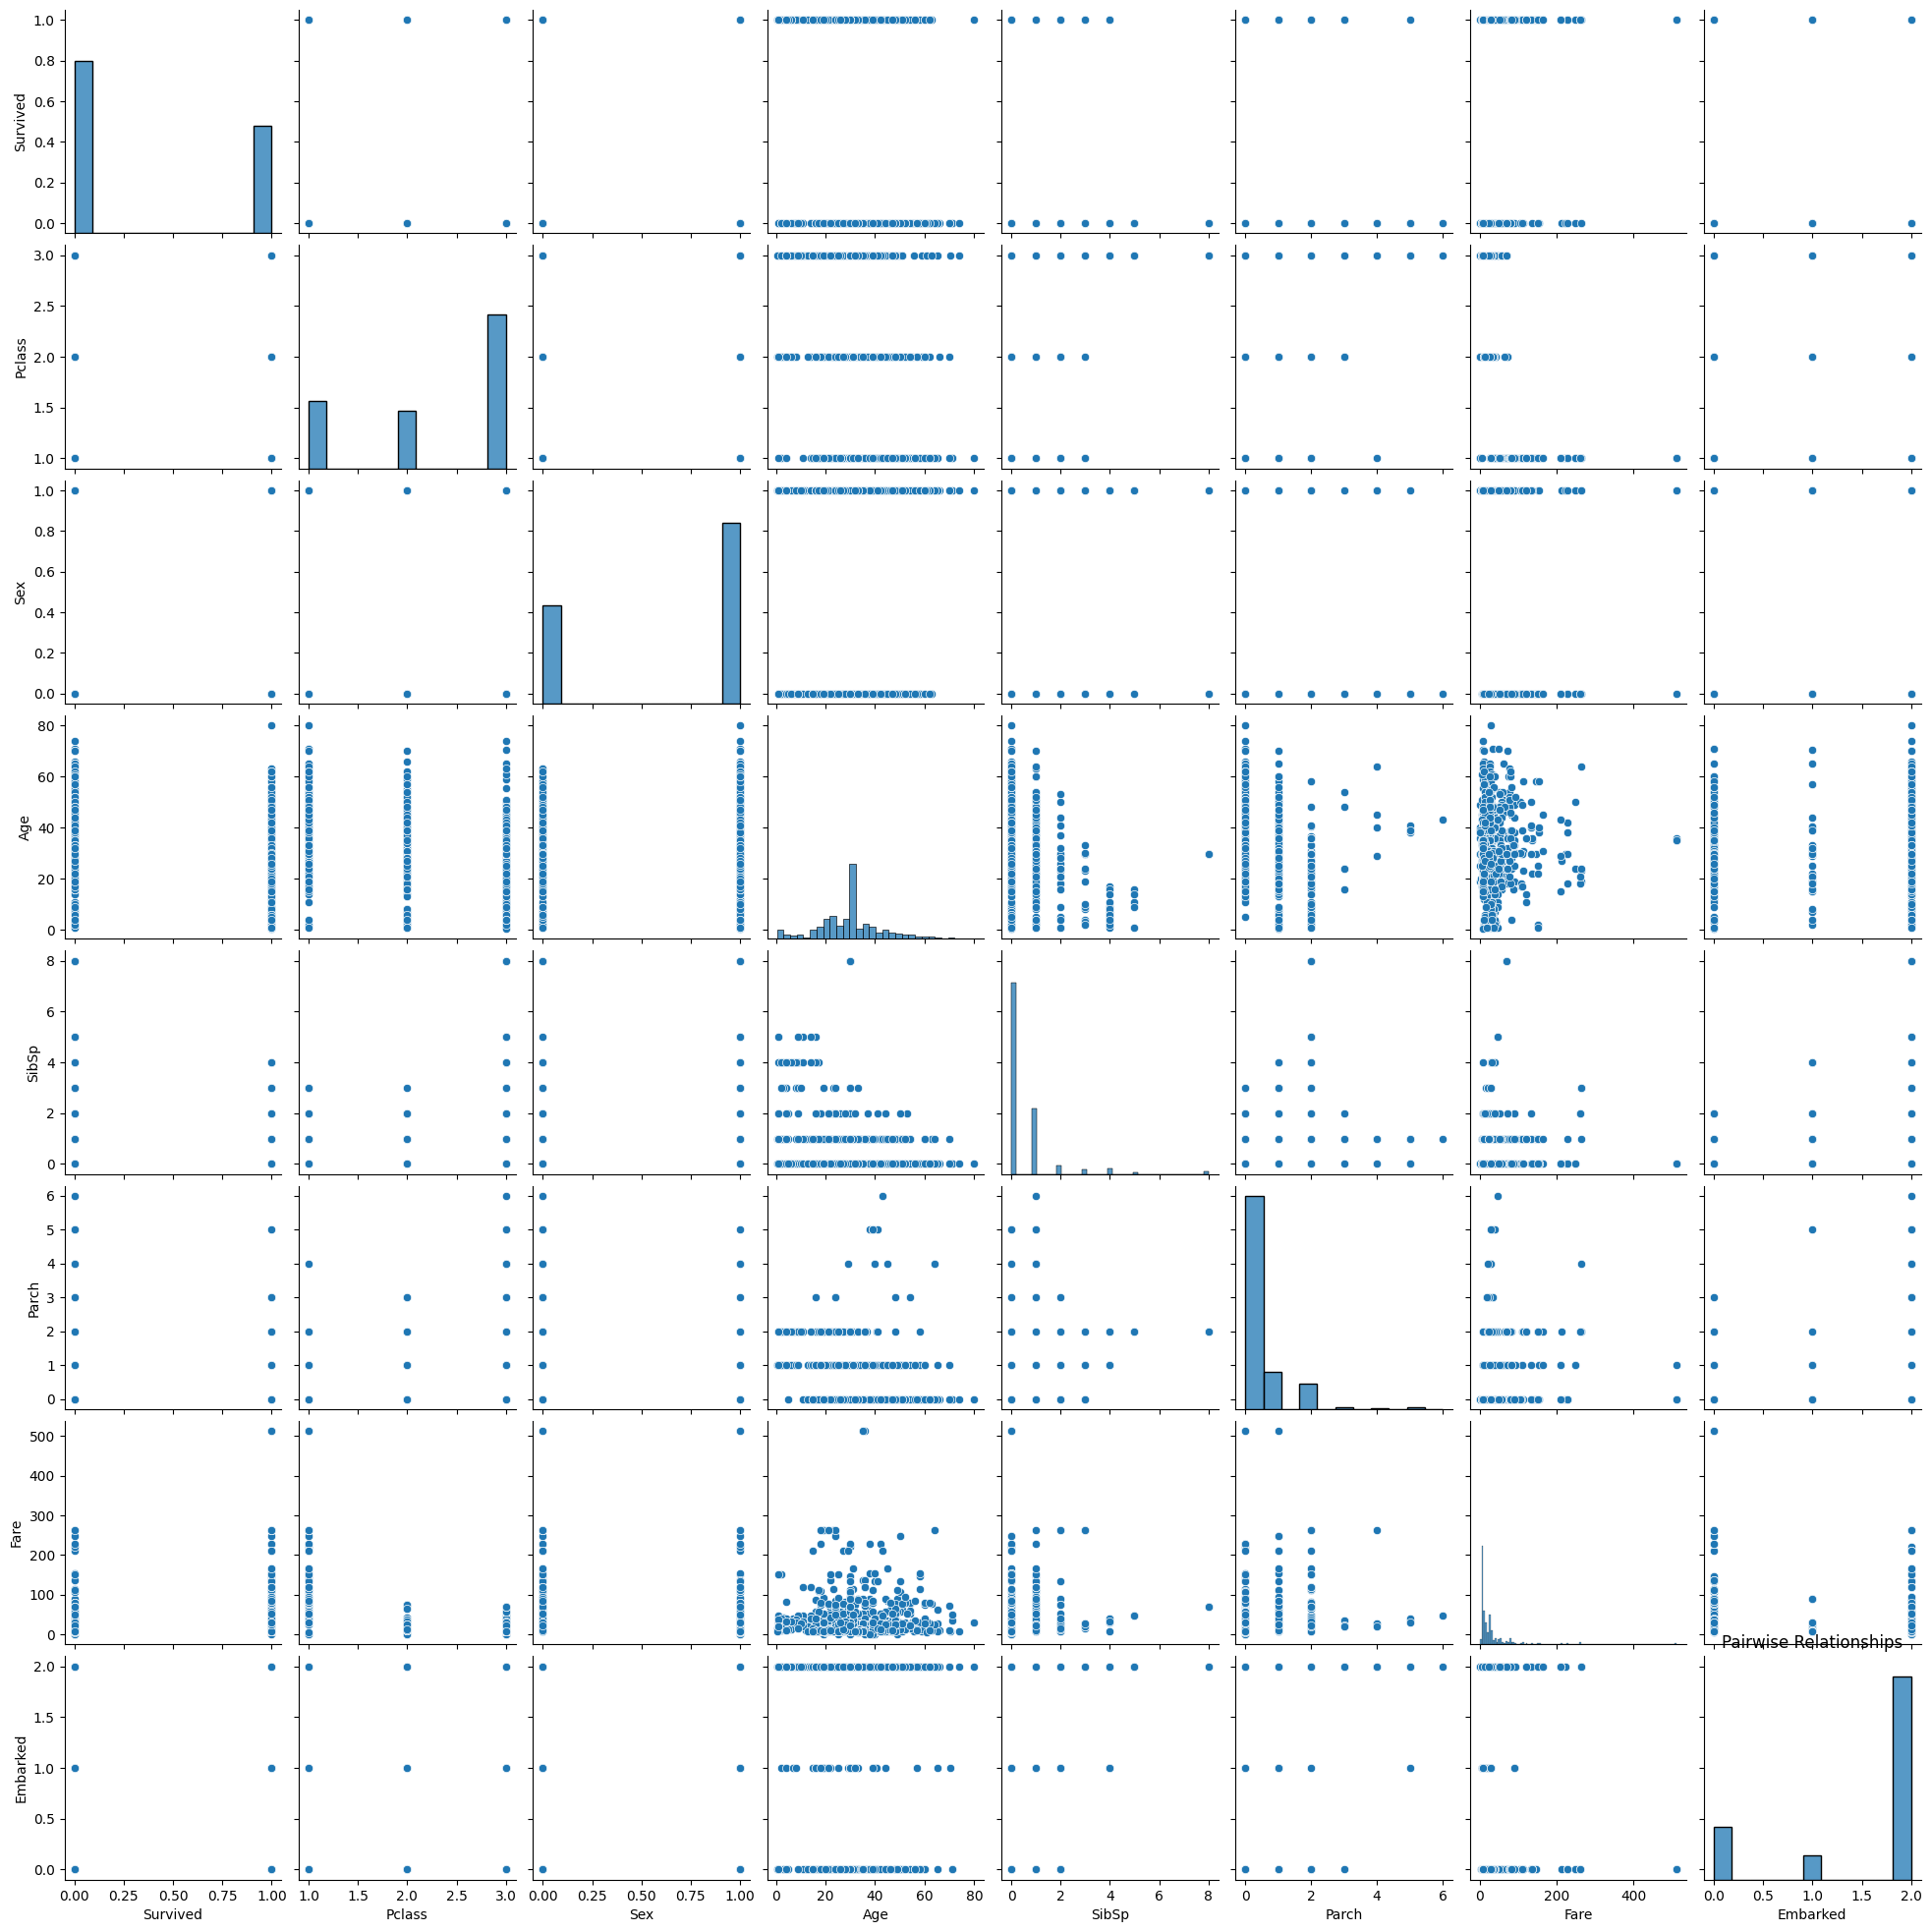


Creating correlation matrix heatmap...


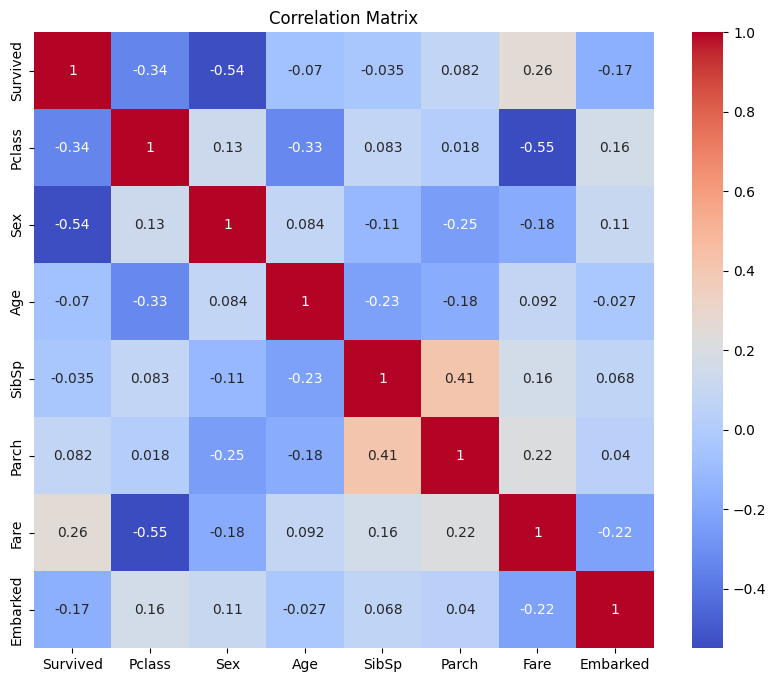

In [20]:
# Step 2: Generate summary statistics

# Summary statistics for numeric columns only
print("\nSummary Statistics (Numeric Columns Only):")
print(data.describe())

# Mean, Median, and Standard Deviation for numeric columns
print("Mean Values:\n", data.select_dtypes(include=['float64', 'int64']).mean())
print("Median Values:\n", data.select_dtypes(include=['float64', 'int64']).median())
print("Standard Deviation:\n", data.select_dtypes(include=['float64', 'int64']).std())


# Step 3: Visualizations
## Histogram for numeric features
print("\nCreating histograms...")
data.hist(figsize=(10, 8))
plt.suptitle('Histograms for Numeric Features')
plt.show()

## Boxplot for numeric features
print("\nCreating boxplots...")
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

## Pairplot to show relationships
print("\nCreating pairplot...")
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.title('Pairwise Relationships')
plt.show()

## Correlation matrix
print("\nCreating correlation matrix heatmap...")
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

